# Capstone Project - The Battle of Neighborhoods (Week 1)

## Introduction to the business problem

This business problem is part of the first part of the IBM Data Science specialization. The purpose of this capstone is to define a problem or an idea of my choice, where I would need to leverage the Foursquare location data to solve or execute. According to this criteria, I've decided to create a case described below. <br>

Find opportunities in the Mexican market for Luxury Goods is a task that we can achieve with the right Data Analysis. According to statista.com the luxury market size in Mexico is about US $3.584 M, one of the largest in Latin America. <br>

In Mexico City, a client / contractor is interested in knowing where to open a luxury goods store at Coyoacan borough of Mexico City, it is important to know the economic development of the neighborhoods, as well as to know the 10 businesses closest common to know the competition and preferences of the area to study in order to discover the right place to open a store to be successful.

### Data will be using:

This is important to merge the zip codes dataframe with the coordinates provided by HERE API<br> 
Postal Codes and neighborhoods: https://www.correosdemexico.gob.mx/SSLServicios/ConsultaCP/CodigoPostal_Exportar.aspx <br>
Here API to know the neighborhoods location: https://developer.here.com/ <br>

The Social Development Index by neighborhood will help to know the economic development of the neighborhoods, as well as to know the 10 businesses closest common to know the competition and preferences of the area, this is provided by Mexico City goverment website. <br>
Social Development Index by neighborhood, Mexico City neighborhood: http://www.sideso.cdmx.gob.mx/index.php?id=551 <br>
Foursquare API for venue location : https://developer.foursquare.com/ <br>

Foursquare API to make an analysis of the principal venues of the Neighborhoods: https://developer.foursquare.com/ <br>

# Capstone Project - The Battle of Neighborhoods (Week 2)

## Segmenting and Clustering Neighborhoods in Mexico City

In [1]:
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install geocoder

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [4]:
!pip install --upgrade lxml

Requirement already up-to-date: lxml in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (4.5.1)


In [5]:
import pandas as pd
#url=("Ciudad de México.xls")
tables = pd.read_excel(r"Ciudad de México.xls")
print(tables)
#print(tables[0])
#df=tables[0]

      d_codigo                    d_asenta d_tipo_asenta         D_mnpio  \
0         1000                   San Ángel       Colonia  Álvaro Obregón   
1         1010                   Los Alpes       Colonia  Álvaro Obregón   
2         1020               Guadalupe Inn       Colonia  Álvaro Obregón   
3         1030                      Axotla        Pueblo  Álvaro Obregón   
4         1030                     Florida       Colonia  Álvaro Obregón   
...        ...                         ...           ...             ...   
1534     16840      Santa Cruz Chavarrieta       Colonia      Xochimilco   
1535     16850                 Chapultepec        Barrio      Xochimilco   
1536     16860     Santa Cruz de Guadalupe       Colonia      Xochimilco   
1537     16880     Santa Cecilia Tepetlapa        Pueblo      Xochimilco   
1538     16900  San Francisco Tlalnepantla        Pueblo      Xochimilco   

              d_estado          d_ciudad   d_CP  c_estado  c_oficina  c_CP  \
0     Ciu

In [6]:
tables

d_codigo                    d_asenta d_tipo_asenta         D_mnpio  \
0         1000                   San Ángel       Colonia  Álvaro Obregón   
1         1010                   Los Alpes       Colonia  Álvaro Obregón   
2         1020               Guadalupe Inn       Colonia  Álvaro Obregón   
3         1030                      Axotla        Pueblo  Álvaro Obregón   
4         1030                     Florida       Colonia  Álvaro Obregón   
...        ...                         ...           ...             ...   
1534     16840      Santa Cruz Chavarrieta       Colonia      Xochimilco   
1535     16850                 Chapultepec        Barrio      Xochimilco   
1536     16860     Santa Cruz de Guadalupe       Colonia      Xochimilco   
1537     16880     Santa Cecilia Tepetlapa        Pueblo      Xochimilco   
1538     16900  San Francisco Tlalnepantla        Pueblo      Xochimilco   

              d_estado          d_ciudad   d_CP  c_estado  c_oficina  c_CP  \
0     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
1     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
2     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
3     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
4     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
...                ...               ...    ...       ...        ...   ...   
1534  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1535  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1536  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1537  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1538  Ciudad de México  Ciudad de México  16001         9      16001   NaN   

      c_tipo_asenta  c_mnpio  id_asenta_cpcons  d_zona  c_cve_ciudad  
0                 9       10                 1  Urbano             1  
1                 9       10                 5  Urbano             1  
2                 9       10                 6  Urbano             1  
3                28       10                 9  Urbano             1  
4                 9       10                10  Urbano             1  
...             ...      ...               ...     ...           ...  
1534              9       13              2519  Urbano            16  
1535              2       13              2520  Urbano            16  
1536              9       13              2521  Urbano            16  
1537             28       13              2527  Urbano            16  
1538             28       13              2530  Urbano            16  

[1539 rows x 15 columns]

In [7]:
cdmx=tables[['d_codigo','D_mnpio','d_asenta']]
cdmx.head()
#cdmx.to_frame()

d_codigo         D_mnpio       d_asenta
0      1000  Álvaro Obregón      San Ángel
1      1010  Álvaro Obregón      Los Alpes
2      1020  Álvaro Obregón  Guadalupe Inn
3      1030  Álvaro Obregón         Axotla
4      1030  Álvaro Obregón        Florida

In [8]:
cdmx.shape

(1539, 3)

In [9]:
#https://developer.here.com/blog/understanding-geocoding-with-python
import requests
i=0

for cp, borrowhood, neighborhood in zip(cdmx["d_codigo"], cdmx["D_mnpio"], cdmx["d_asenta"]):
    
    URL = "https://geocode.search.hereapi.com/v1/geocode"
    #location = "1000, Álvaro Obregón, Ciudad de México" #taking user input
    location = "{},{},{}".format(cp, borrowhood, neighborhood)
    api_key = 'qoLgTnaCZ0oAM52dIbKGBdiwMbL0M5-A5IehEXPPqGE' # Acquire from developer.here.com
    PARAMS = {'apikey':api_key,'q':location}
    # sending get request and saving the response as response object 
    r = requests.get(url = URL, params = PARAMS) 
    data = r.json()
    
    try:
        latitude = data['items'][0]['position']['lat']
        longitude = data['items'][0]['position']['lng']
        
        if i == 0:
            get_geocoder=[(("{}".format(cp)), latitude, longitude)]            
            get_geocoder2=pd.DataFrame(get_geocoder,columns =['d_codigo', 'latitude', 'longitude'])
            i=i+1
        else:
            new_row = {'d_codigo':"{}".format(cp), 'latitude':latitude, 'longitude':longitude}
            #append row to the dataframe
            get_geocoder2 = get_geocoder2.append(new_row, ignore_index=True)
            #get_geocoder2 = get_geocoder2.append(get_geocoder, ignore_index=True)
            i=i+1
    except IndexError:
        # Return something that tells the user no results where found
        print("None")
           #/code that runs when error happen
    

None
None
None
None
None


In [10]:
get_geocoder2.head()
get_geocoder2.shape

(1534, 3)

In [11]:
get_geocoder2.head()

d_codigo  latitude  longitude
0     1000  19.34602  -99.19177
1     1010  19.36094  -99.19382
2     1020  19.34655  -99.20738
3     1030  19.36300  -99.17728
4     1030  19.35530  -99.18151

# Juntar Dataframes

In [12]:
get_geocoder2['d_codigo']=get_geocoder2['d_codigo'].astype(int)
Neighborhoods = pd.merge(cdmx, get_geocoder2, on='d_codigo')

In [13]:
Neighborhoods.columns = ['Postal Code','Borough','Neighborhood','Latitude','Longitude']
Neighborhoods.head()

Postal Code         Borough   Neighborhood  Latitude  Longitude
0         1000  Álvaro Obregón      San Ángel  19.34602  -99.19177
1         1010  Álvaro Obregón      Los Alpes  19.36094  -99.19382
2         1020  Álvaro Obregón  Guadalupe Inn  19.34655  -99.20738
3         1030  Álvaro Obregón         Axotla  19.36300  -99.17728
4         1030  Álvaro Obregón         Axotla  19.35530  -99.18151

In [14]:
Neighborhoods=Neighborhoods.dropna()

In [15]:
address = 'Ciudad de México, México'

geolocator = Nominatim(user_agent="mexico_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico are 19.4326296, -99.1331785.


In [16]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Filtrar por delegación (Boroughood) sin ejecutar

In [17]:
alv_obr_data = Neighborhoods[Neighborhoods['Borough'].str.contains("Xochimilco", case=False)].reset_index(drop=True)
#alv_obr_data.head()
#alv_obr_data.dtypes
alv_obr_data.shape


(220, 5)

In [18]:
alv_obr_data.head()

Postal Code     Borough            Neighborhood  Latitude  Longitude
0        16000  Xochimilco  La Concepción Tlacoapa  19.26893  -99.10475
1        16000  Xochimilco  La Concepción Tlacoapa  19.26182  -99.10762
2        16000  Xochimilco  La Concepción Tlacoapa  19.26551  -99.10684
3        16000  Xochimilco             San Antonio  19.26893  -99.10475
4        16000  Xochimilco             San Antonio  19.26182  -99.10762

# Generar mapa CDMX con Delegaciones y Colonias

In [19]:
# CDMX latitude and longitude
cdmx_lat = 19.4326296
cdmx_lng = -99.1331785

# Creates map of CDMX using latitude and longitude values
map_cdmx = folium.Map(location=[cdmx_lat, cdmx_lng], zoom_start=10)

# Add markers to map
for lat, lng, neighbourhood in zip(Neighborhoods['Latitude'], Neighborhoods['Longitude'], Neighborhoods['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cdmx)  
    
map_cdmx

# Generar Dataframe de la delegacion


In [20]:
Neighborhoods['Borough'].unique()

array(['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán',
       'Cuajimalpa de Morelos', 'Cuauhtémoc', 'Gustavo A. Madero',
       'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
       'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan',
       'Venustiano Carranza', 'Xochimilco'], dtype=object)

In [21]:
borough_target="Coyoacán"

In [22]:
borough_data = Neighborhoods[Neighborhoods['Borough'].str.contains(borough_target, case=False)].reset_index(drop=True)
#alv_obr_data.head()
#alv_obr_data.dtypes
borough_data.shape


(166, 5)

In [23]:
borough_data.head()

Postal Code   Borough       Neighborhood  Latitude  Longitude
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331
1         4010  Coyoacán     Santa Catarina  19.34809  -99.17231
2         4020  Coyoacán      La Concepción  19.34480  -99.15750
3         4030  Coyoacán          San Lucas  19.34863  -99.15401
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520

In [24]:
address = 'Coyoacán, Ciudad de México'

geolocator = Nominatim(user_agent="mexico_explorer")
location = geolocator.geocode(address)
borough_latitude = location.latitude
borough_longitude = location.longitude
print('The geograpical coordinate of Mexico are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico are 19.4326296, -99.1331785.


In [25]:
# Creates map of Milpa Alta using latitude and longitude values
map_borough = folium.Map(location=[borough_latitude, borough_longitude], zoom_start=13)

# Add markers to map
for lat, lng, neighbourhood in zip(borough_data['Latitude'], borough_data['Longitude'], borough_data['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_borough)  
    
map_borough

In [63]:
CLIENT_ID = 'RD3XL0PWSBNG2HHH0JGFLKYRTUQJVC3KPHS5VBWHZKVR0V2R' # your Foursquare ID
CLIENT_SECRET = 'S1PFT4XOBGNZPKF2OPRPIQMKFD4BL0QE3UI2STE244SX5EC3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
#old_toronto_data = Neighborhoods[Neighborhoods['Borough'] == 'Toronto'].reset_index(drop=True)
#old_toronto_data.head()

Your credentails:
CLIENT_ID: RD3XL0PWSBNG2HHH0JGFLKYRTUQJVC3KPHS5VBWHZKVR0V2R
CLIENT_SECRET:S1PFT4XOBGNZPKF2OPRPIQMKFD4BL0QE3UI2STE244SX5EC3


In [64]:
borough_data.head()

Postal Code   Borough       Neighborhood  Latitude  Longitude
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331
1         4010  Coyoacán     Santa Catarina  19.34809  -99.17231
2         4020  Coyoacán      La Concepción  19.34480  -99.15750
3         4030  Coyoacán          San Lucas  19.34863  -99.15401
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        #global url
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
LIMIT=100

borough_venues = getNearbyVenues(names=borough_data['Neighborhood'],
                                   latitudes=borough_data['Latitude'],
                                   longitudes=borough_data['Longitude']
                                  )



Villa Coyoacán
Santa Catarina
La Concepción
San Lucas
Parque San Andrés
Del Carmen
San Diego Churubusco
San Diego Churubusco
San Mateo
San Mateo
Campestre Churubusco
Churubusco Country Club
Prado Churubusco
Hermosillo
Paseos de Taxqueña
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de San Juan
San Francisco Culhuacán Barrio de San Juan
San Francisco Culhuacán Barrio de San Juan
San Francisco Culhuacán Barrio de San Juan
Ajusco
Romero de Terreros
Oxtopulco

In [80]:
borough_venues.head()
borough_venues.shape

(5329, 7)

In [73]:
ids = pd.read_excel(r"IDS.xlsx")
ids.head()

Neighborhood  Habitantes  IDS_N
0            Adolfo Ruiz Cortínez       14119      2
1                          Ajusco       36665      2
2  Alianza Popular Revolucionaria       13627      4
3                       Atlántida         850      3
4                          Avante        9909      4

In [92]:

#get_geocoder2['d_codigo']=get_geocoder2['d_codigo'].astype(int)
borough_venues_IDS = pd.merge(borough_venues, ids, on='Neighborhood')
#borough_venues_IDS = borough_venues_IDS.set_index('Neighborhood')
borough_venues_IDS.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Villa Coyoacán                19.3485               -99.16331   
1  Villa Coyoacán                19.3485               -99.16331   
2  Villa Coyoacán                19.3485               -99.16331   
3  Villa Coyoacán                19.3485               -99.16331   
4  Villa Coyoacán                19.3485               -99.16331   

                   Venue  Venue Latitude  Venue Longitude      Venue Category  \
0               Coyoacán       19.349643       -99.163208        Neighborhood   
1  El Kiosko de Coyoacán       19.349964       -99.162764               Plaza   
2    Ristorante Amarcord       19.347275       -99.162597  Italian Restaurant   
3  Fuente de los Coyotes       19.349150       -99.163446       Historic Site   
4         Jardín Hidalgo       19.349654       -99.162343               Plaza   

   Habitantes  IDS_N  
0        1909      4  
1        1909      4  
2        1909      4  
3        1909      4  
4        1909      4

In [88]:
borough_venues_IDS.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                             
Ajusco                                                              15   
Alianza Popular Revolucionaria                                      76   
Atlántida                                                          115   
Avante                                                              58   
Bosques de Tetlameya                                                47   
Cafetales                                                           35   
Campestre Churubusco                                                36   
Campestre Coyoacán                                                  26   
Cantil del Pedregal                                                 47   
Carmen Serdán                                                       21   
Churubusco Country Club                                             57   
Ciudad Jardín                                                      115   
Copilco El Alto                                                     61   
Copilco El Bajo                                                     23   
Copilco Universidad                                                 61   
Cuadrante de San Francisco                                          35   
Culhuacán CTM CROC                                                 130   
Culhuacán CTM Canal Nacional                                        35   
Culhuacán CTM Sección I                                             73   
Culhuacán CTM Sección II                                            73   
Culhuacán CTM Sección III                                          130   
Culhuacán CTM Sección IX-A                                          62   
Culhuacán CTM Sección IX-B                                          62   
Culhuacán CTM Sección V                                             73   
Culhuacán CTM Sección VI                                           130   
Culhuacán CTM Sección VII                                           30   
Culhuacán CTM Sección VIII                                          62   
Culhuacán CTM Sección X                                             35   
Culhuacán CTM Sección X-A                                          130   
Del Carmen                                                          32   
Educación                                                           41   
El Caracol                                                          34   
El Centinela                                                        24   
El Mirador                                                          43   
El Parque de Coyoacán                                                8   
El Reloj                                                            24   
El Rosario                                                          17   
El Rosedal                                                          80   
Emiliano Zapata Fraccionamiento Popular                             35   
Espartaco                                                           66   
Ex-Ejido de San Francisco Culhuacán                                 19   
Ex-Hacienda Coapa                                                  101   
Haciendas de Coyoacán                                               53   
Hermosillo                                                          20   
Huayamilpas                                                         39   
Insurgentes Cuicuilco                                               29   
Jardines de Coyoacán                                                84   
Jardines del Pedregal de San Ángel                                  30   
Joyas del Pedregal                                                  25   
La Otra Banda                                                       79   
Las Campanas                                                        40   
Los Cedros                                                          76   
Los Cipreses                                         

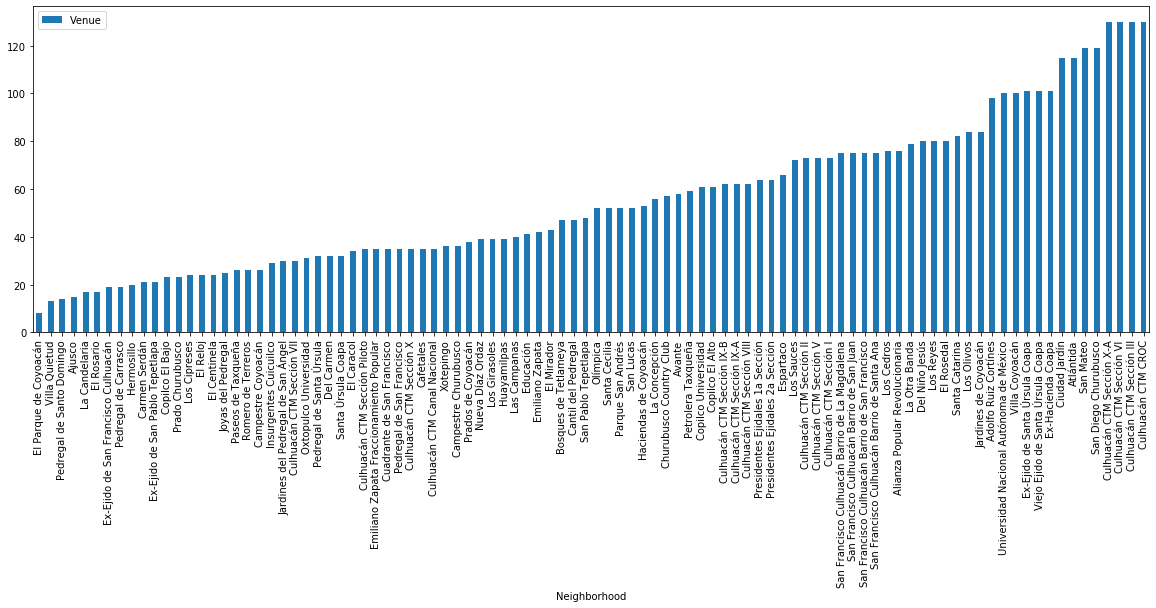

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# step 1: get the data
venue_count=borough_venues.groupby('Neighborhood').count()
venue_count=venue_count.sort_values('Venue')

df_iceland = venue_count[["Venue"]]
df_iceland.head()


# step 2: plot data
df_iceland.plot(kind='bar', figsize=(20, 6))

#plt.xlabel('Year') # add to x-label to the plot
#plt.ylabel('Number of immigrants') # add y-label to the plot
#plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

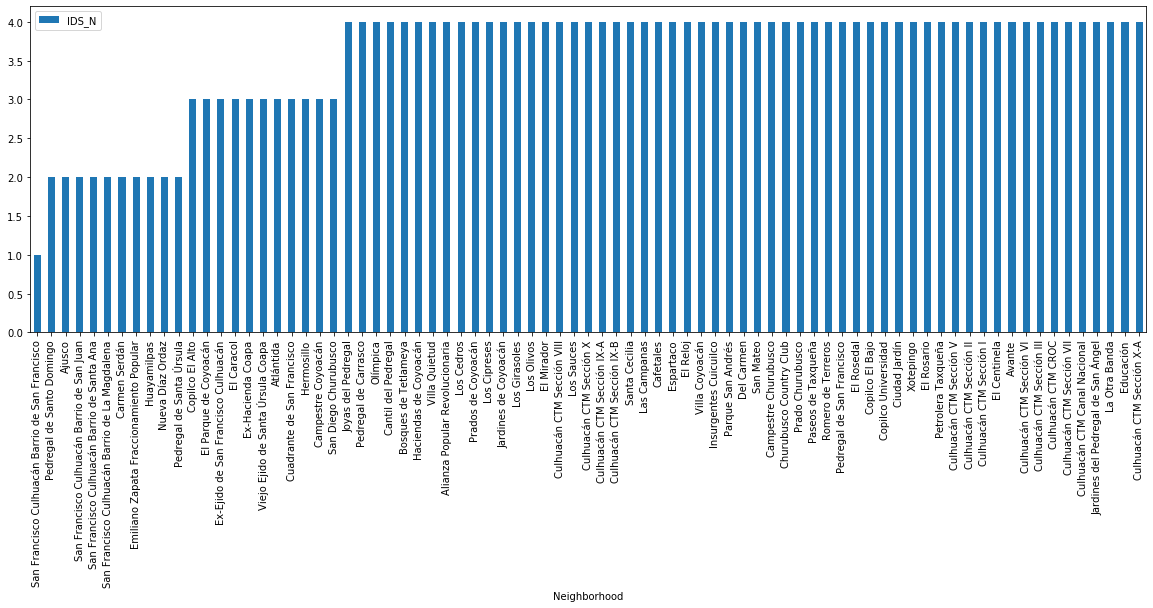

In [138]:
df_IDS = borough_venues_IDS.drop_duplicates(subset="Neighborhood",keep='first')#borough_venues_IDS[["Neighborhood", "IDS_N"]]
df_IDS_2=df_IDS[["Neighborhood","IDS_N"]]
df_IDS_2=df_IDS_2.reset_index(drop=True)
df_IDS_2= df_IDS_2.set_index('Neighborhood')
df_IDS_2=df_IDS_2.sort_values('IDS_N')

#df_IDS_2=df_IDS_2.reset_index(level='Neighborhood')
df_IDS_2
#df_iceland = venue_count[["Venue"]]
#df_iceland.head()


# step 2: plot data
df_IDS_2.plot(kind='bar', figsize=(20, 6))

#plt.xlabel('Year') # add to x-label to the plot
#plt.ylabel('Number of immigrants') # add y-label to the plot
#plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

#plt.show()

In [172]:
#df_IDS_3=df_IDS_2[df_IDS_2['IDS_N'] > 3]
#df_IDS_3

df_IDS_3=borough_venues_IDS[borough_venues_IDS['IDS_N'] > 3]
df_IDS_3.head()
borough_venues=df_IDS_3

In [173]:
print('There are {} uniques categories.'.format(len(borough_venues['Venue Category'].unique())))

There are 217 uniques categories.


In [174]:
# one hot encoding
neighborhood_onehot = pd.get_dummies(borough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighborhood_onehot['Neighborhood'] = borough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [neighborhood_onehot.columns[-1]] + list(neighborhood_onehot.columns[:-1])
neighborhood_onehot = neighborhood_onehot[fixed_columns]

neighborhood_onehot.head()

Yoga Studio  Accessories Store  American Restaurant  Arcade  \
0            0                  0                    0       0   
1            0                  0                    0       0   
2            0                  0                    0       0   
3            0                  0                    0       0   
4            0                  0                    0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  Baseball Field  \
0          0           0           0       0    0               0   
1          0           0           0       0    0               0   
2          0           0           0       0    0               0   
3          0           0           0       0    0               0   
4          0           0           0       0    0               0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Store  Bistro  Bookstore  \
0                 0                0         0           0       0          0   
1                 0                0         0           0       0          0   
2                 0                0         0           0       0          0   
3                 0                0         0           0       0          0   
4                 0                0         0           0       0          0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               0        0   

   Bridal Shop  Burger Joint  Burrito Place  Bus Line  Butcher  Cafeteria  \
0            0             0              0         0        0          0   
1            0             0              0         0        0          0   
2            0             0              0         0        0          0   
3            0             0              0         0        0          0   
4            0             0              0         0        0          0   

   Café  Camera Store  Candy Store  Casino  Castle  Cave  Cheese Shop  \
0     0             0            0       0       0     0            0   
1     0             0            0       0       0     0            0   
2     0             0            0       0       0     0            0   
3     0             0            0       0       0     0            0   
4     0             0            0       0       0     0            0   

   Chinese Restaurant  Church  Circus  Clothing Store  Cocktail Bar  \
0                   0       0       0               0             0   
1                   0       0       0               0             0   
2                   0       0       0               0             0   
3                   0       0       0               0             0   
4                   0       0       0               0             0   

   Coffee Shop  College Arts Build

In [175]:
neighborhood_onehot.shape

(3192, 217)

In [176]:
neighborhood_grouped = neighborhood_onehot.groupby('Neighborhood').mean().reset_index()
neighborhood_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0       Alianza Popular Revolucionaria     0.000000           0.000000   
1                               Avante     0.000000           0.000000   
2                 Bosques de Tetlameya     0.000000           0.000000   
3                            Cafetales     0.000000           0.000000   
4                 Campestre Churubusco     0.000000           0.000000   
5                  Cantil del Pedregal     0.000000           0.000000   
6              Churubusco Country Club     0.000000           0.000000   
7                        Ciudad Jardín     0.000000           0.000000   
8                      Copilco El Bajo     0.000000           0.000000   
9                  Copilco Universidad     0.000000           0.016393   
10                  Culhuacán CTM CROC     0.000000           0.000000   
11        Culhuacán CTM Canal Nacional     0.000000           0.000000   
12             Culhuacán CTM Sección I     0.000000           0.000000   
13            Culhuacán CTM Sección II     0.000000           0.000000   
14           Culhuacán CTM Sección III     0.000000           0.000000   
15          Culhuacán CTM Sección IX-A     0.000000           0.000000   
16          Culhuacán CTM Sección IX-B     0.000000           0.000000   
17             Culhuacán CTM Sección V     0.000000           0.000000   
18            Culhuacán CTM Sección VI     0.000000           0.000000   
19           Culhuacán CTM Sección VII     0.000000           0.000000   
20          Culhuacán CTM Sección VIII     0.000000           0.000000   
21             Culhuacán CTM Sección X     0.000000           0.000000   
22           Culhuacán CTM Sección X-A     0.000000           0.000000   
23                          Del Carmen     0.000000           0.000000   
24                           Educación     0.000000           0.000000   
25                        El Centinela     0.000000           0.000000   
26                          El Mirador     0.000000           0.000000   
27                            El Reloj     0.000000           0.000000   
28                          El Rosario     0.000000           0.000000   
29                          El Rosedal     0.012500           0.000000   
30                           Espartaco     0.000000           0.000000   
31               Haciendas de Coyoacán     0.000000           0.000000   
32               Insurgentes Cuicuilco     0.000000           0.000000   
33                Jardines de Coyoacán     0.000000           0.000000   
34  Jardines del Pedregal de San Ángel     0.000000           0.000000   
35                  Joyas del Pedregal     0.000000           0.000000   
36                       La Otra Banda     0.012658           0.000000   
37                        Las Campanas     0.000000           0.000000   
38                          Los Cedros     0.000000           0.000000   
39                        Los Cipreses     0.000000           0.000000   
40                       Los Girasoles     0.000000           0.000000   
41                          Los Olivos     0.000000           0.000000   
42                          Los Sauces     0.013889           0.000000   
43                            Olímpica     0.000000           0.000000   
44                   Parque San Andrés     0.000000           0.000000   
45                  Paseos de Taxqueña     0.000000           0.000000   
46                Pedregal de Carrasco     0.000000           0.000000   
47           Pedregal de San Francisco     0.000000           0.000000   
48                  Petrolera Taxqueña     0.000000           0.000000   
49                    Prado Churubusco     0.000000           0.000000   
50                  Prados de Coyoacán     0.000000           0.000000   
51                  Romero de Terreros     0.000000           0.000000   
52                           San Mateo     0.000000           0.000000   
53                       Santa

In [177]:
neighborhood_grouped.shape

(57, 217)

In [178]:
num_top_venues = 5

for hood in neighborhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhood_grouped[neighborhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alianza Popular Revolucionaria----
                venue  freq
0  Mexican Restaurant  0.14
1          Taco Place  0.13
2        Burger Joint  0.07
3   Convenience Store  0.07
4        Liquor Store  0.05


----Avante----
                venue  freq
0          Taco Place  0.17
1  Mexican Restaurant  0.17
2          Restaurant  0.07
3         Pizza Place  0.07
4      Ice Cream Shop  0.05


----Bosques de Tetlameya----
               venue  freq
0       Soccer Field  0.11
1     Soccer Stadium  0.11
2               Park  0.11
3  Convenience Store  0.09
4         Restaurant  0.06


----Cafetales----
                venue  freq
0  Mexican Restaurant  0.20
1        Burger Joint  0.11
2          Taco Place  0.09
3              Bakery  0.06
4          Steakhouse  0.06


----Campestre Churubusco----
                venue  freq
0  Mexican Restaurant  0.08
1          Taco Place  0.08
2   Convenience Store  0.08
3                Park  0.08
4                Café  0.06


----Cantil del Pedregal---

In [179]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [200]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhood_grouped['Neighborhood']

for ind in np.arange(neighborhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Alianza Popular Revolucionaria    Mexican Restaurant            Taco Place   
1                          Avante    Mexican Restaurant            Taco Place   
2            Bosques de Tetlameya                  Park        Soccer Stadium   
3                       Cafetales    Mexican Restaurant          Burger Joint   
4            Campestre Churubusco            Taco Place     Convenience Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Convenience Store          Burger Joint          Liquor Store   
1           Pizza Place            Restaurant     Convenience Store   
2          Soccer Field     Convenience Store            Restaurant   
3            Taco Place            Steakhouse    Seafood Restaurant   
4                  Park    Mexican Restaurant                  Café   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Ice Cream Shop           Coffee Shop             Pool Hall   
1        Ice Cream Shop    Seafood Restaurant                  Park   
2         Grocery Store   American Restaurant                  Café   
3            Restaurant                Bakery        Ice Cream Shop   
4            Restaurant           Pizza Place            Food Truck   

  9th Most Common Venue 10th Most Common Venue  
0            Food Truck           Dessert Shop  
1                   Gym             Food Truck  
2    Mexican Restaurant                 Garden  
3        Sandwich Place        Floating Market  
4                 Diner                Dog Run

In [201]:
# set number of clusters
kclusters = 5

neighborhood_grouped_clustering = neighborhood_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 2, 1, 1, 2, 2, 1, 2, 2], dtype=int32)

In [202]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

borough_merged = borough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
borough_merged = borough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


borough_merged.dropna()
borough_merged.head() # check the last columns!

Postal Code   Borough       Neighborhood  Latitude  Longitude  \
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331   
1         4010  Coyoacán     Santa Catarina  19.34809  -99.17231   
2         4020  Coyoacán      La Concepción  19.34480  -99.15750   
3         4030  Coyoacán          San Lucas  19.34863  -99.15401   
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             2.0    Mexican Restaurant           Coffee Shop   
1             NaN                   NaN                   NaN   
2             NaN                   NaN                   NaN   
3             NaN                   NaN                   NaN   
4             1.0    Mexican Restaurant              Pharmacy   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop                  Café                 Plaza   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4            Taco Place            Restaurant    Salon / Barbershop   

  6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
0             Bookstore                    Art Gallery                   Bar   
1                   NaN                            NaN                   NaN   
2                   NaN                            NaN                   NaN   
3                   NaN                            NaN                   NaN   
4  Gym / Fitness Center  Vegetarian / Vegan Restaurant                 Hotel   

  9th Most Common Venue 10th Most Common Venue  
0             Gift Shop                Theater  
1                   NaN                    NaN  
2                   NaN                    NaN  
3                   NaN                    NaN  
4        Breakfast Spot         Soccer Stadium

In [203]:
borough_merged=borough_merged.dropna()
borough_merged['Cluster Labels'] = borough_merged['Cluster Labels'].astype(int)
#borough_merged=borough_merged["Cluster Labels"].astype('int32').dtypes
borough_merged.head() # check the last columns!

Postal Code   Borough       Neighborhood  Latitude  Longitude  \
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331   
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520   
5         4100  Coyoacán         Del Carmen  19.35412  -99.16167   
8         4120  Coyoacán          San Mateo  19.35402  -99.14794   
9         4120  Coyoacán          San Mateo  19.35020  -99.14834   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               2    Mexican Restaurant           Coffee Shop   
4               1    Mexican Restaurant              Pharmacy   
5               2        Ice Cream Shop                  Café   
8               2            Taco Place                  Café   
9               2            Taco Place                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop                  Café                 Plaza   
4            Taco Place            Restaurant    Salon / Barbershop   
5    Mexican Restaurant               Theater                Bakery   
8    Mexican Restaurant     Convenience Store        History Museum   
9    Mexican Restaurant     Convenience Store        History Museum   

  6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
0             Bookstore                    Art Gallery                   Bar   
4  Gym / Fitness Center  Vegetarian / Vegan Restaurant                 Hotel   
5                 Plaza             Spanish Restaurant             Bookstore   
8           Coffee Shop                       Pharmacy            Restaurant   
9           Coffee Shop                       Pharmacy            Restaurant   

    9th Most Common Venue   10th Most Common Venue  
0               Gift Shop                  Theater  
4          Breakfast Spot           Soccer Stadium  
5     Japanese Restaurant          Bed & Breakfast  
8  Argentinian Restaurant  Health & Beauty Service  
9  Argentinian Restaurant  Health & Beauty Service

In [204]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough_merged['Latitude'], borough_merged['Longitude'], borough_merged['Neighborhood'], borough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [205]:
borough_merged.loc[borough_merged['Cluster Labels'] == 0, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
107  Insurgentes Cuicuilco               0        Cosmetics Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
107        Ice Cream Shop        Lingerie Store         Jewelry Store   

    5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
107      Video Game Store  Furniture / Home Store         Shopping Mall   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
107    Mexican Restaurant           Snack Place            Candy Store

In [206]:
borough_merged.loc[borough_merged['Cluster Labels'] == 1, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
4                 Parque San Andrés               1    Mexican Restaurant   
10             Campestre Churubusco               1            Taco Place   
55                    Ciudad Jardín               1            Taco Place   
56                    Ciudad Jardín               1            Taco Place   
65                        Educación               1     Convenience Store   
66               Petrolera Taxqueña               1            Restaurant   
106                   La Otra Banda               1                   Bar   
109                       Xotepingo               1    Mexican Restaurant   
114              Joyas del Pedregal               1          Burger Joint   
122  Alianza Popular Revolucionaria               1    Mexican Restaurant   
123  Alianza Popular Revolucionaria               1    Mexican Restaurant   
124                      Los Cedros               1    Mexican Restaurant   
125                      Los Cedros               1    Mexican Restaurant   
126              Prados de Coyoacán               1            Taco Place   
130                       Espartaco               1    Mexican Restaurant   
146                       Cafetales               1    Mexican Restaurant   
148                   Los Girasoles               1            Restaurant   
150                   Santa Cecilia               1    Mexican Restaurant   
152         Culhuacán CTM Sección X               1    Mexican Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4                Pharmacy            Taco Place            Restaurant   
10      Convenience Store                  Park    Mexican Restaurant   
55     Mexican Restaurant                Bakery            Restaurant   
56     Mexican Restaurant                Bakery            Restaurant   
65              Pet Store    Mexican Restaurant            Restaurant   
66      Convenience Store    Mexican Restaurant            Taco Place   
106           Coffee Shop    Mexican Restaurant            Taco Place   
109            Restaurant           Coffee Shop                   Gym   
114     Convenience Store                   Gym           Pizza Place   
122            Taco Place     Convenience Store          Burger Joint   
123            Taco Place     Convenience Store          Burger Joint   
124            Taco Place     Convenience Store          Burger Joint   
125            Taco Place     Convenience Store          Burger Joint   
126    Mexican Restaurant             Pet Store           Pizza Place   
130            Taco Place    Seafood Restaurant            Restaurant   
146          Burger Joint            Taco Place            Steakhouse   
148            Taco Place     Convenience Store                  Café   
150            Taco Place     Convenience Store                  Park   
152          Burger Joint           Coffee Shop            Restaurant   

    5th Most Common Venue   6th Most Common Venue  \
4      Salon / Barbershop    Gym / Fitness Center   
10                   Café              Restaurant   
55           Burger Joint            Dance Studio   
56           Burger Joint            Dance Studio   
65            Snack Place               BBQ Joint   
66            Coffee Shop  Argentinian Restaurant   
106            Restaurant      Seafood Restaurant   
109            Taco Place            Dance Studio   
114                  Park              Taco Place   
122          Liquor Store          Ice Cream Shop   
123          Liquor Store          Ice Cream Shop   
124          Liquor Store          Ice Cream Shop   
125          Liquor Store          Ice Cream Shop   
126            Restaurant      Seafood Restaurant   
130     Convenience Store          Breakfast Spot   
146    Seafood Restaurant              Restaurant   
148       Motorcycle Shop                 Brewery   
150            Restaurant            Burger Joint   
152           

In [207]:
borough_merged.loc[borough_merged['Cluster Labels'] == 2, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
0                        Villa Coyoacán               2    Mexican Restaurant   
5                            Del Carmen               2        Ice Cream Shop   
8                             San Mateo               2            Taco Place   
9                             San Mateo               2            Taco Place   
11              Churubusco Country Club               2    Mexican Restaurant   
14                   Paseos de Taxqueña               2                  Café   
32                   Romero de Terreros               2           Coffee Shop   
36            Pedregal de San Francisco               2            Food Truck   
37            Pedregal de San Francisco               2            Food Truck   
38                           El Rosedal               2    Mexican Restaurant   
39                           El Rosedal               2    Mexican Restaurant   
40                           El Rosedal               2    Mexican Restaurant   
47                      Copilco El Bajo               2  Gym / Fitness Center   
50                  Copilco Universidad               2    Mexican Restaurant   
51                  Copilco Universidad               2    Mexican Restaurant   
104  Jardines del Pedregal de San Ángel               2  Fast Food Restaurant   
115                Pedregal de Carrasco               2           Pizza Place   
116                            Olímpica               2    Mexican Restaurant   
117                 Cantil del Pedregal               2                  Park   
118                 Cantil del Pedregal               2                  Park   
119                Bosques de Tetlameya               2                  Park   
120                Bosques de Tetlameya               2                  Park   
128                        Los Cipreses               2           Pizza Place   
131                Jardines de Coyoacán               2            Taco Place   
132                Jardines de Coyoacán               2            Taco Place   
133                          Los Olivos               2            Taco Place   
134                          Los Olivos               2            Taco Place   
149                        Las Campanas               2                  Park   
153                          Los Sauces               2    Mexican Restaurant   
154                          El Mirador               2    Mexican Restaurant   
155                       Villa Quietud               2    Mexican Restaurant   
156               Haciendas de Coyoacán               2           Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue  \
0             Coffee Shop        Ice Cream Shop   
5                    Café    Mexican Restaurant   
8                    Café    Mexican Restaurant   
9                    Café    Mexican Restaurant   
11                Theater               Brewery   
14                   Park                  Food   
32                   Park          Dessert Shop   
36            Pizza Place     Convenience Store   
37            Pizza Place     Convenience Store   
38             Food Truck           Pizza Place   
39             Food Truck           Pizza Place   
40             Food Truck           Pizza Place   
47    Sporting Goods Shop           Coffee Shop   
50         Clothing Store        Ice Cream Shop   
51         Clothing Store        Ice Cream Shop   
104           Salad Place           Wings Joint   
115          Burger Joint          Concert Hall   
116        Ice Cream Shop        Clothing Store   
117        Soccer Stadium          Soccer Field   
118        Soccer Stadium          Soccer Field   
119        Soccer Stadium          Soccer Field   
120        Soccer Stadium          Soccer Field   
128  Gym / Fitness Center             Pet Store   
131                  Park           Pizza Place   
132                  Park           Pizza Place   
133                  Park  

In [208]:
borough_merged.loc[borough_merged['Cluster Labels'] == 3, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
12               Prado Churubusco               3            Taco Place   
57                     El Rosario               3            Taco Place   
58                     El Rosario               3            Taco Place   
68        Culhuacán CTM Sección V               3            Taco Place   
69        Culhuacán CTM Sección V               3            Taco Place   
70        Culhuacán CTM Sección V               3            Taco Place   
71       Culhuacán CTM Sección II               3            Taco Place   
72       Culhuacán CTM Sección II               3            Taco Place   
73       Culhuacán CTM Sección II               3            Taco Place   
74        Culhuacán CTM Sección I               3            Taco Place   
75        Culhuacán CTM Sección I               3            Taco Place   
76        Culhuacán CTM Sección I               3            Taco Place   
77                   El Centinela               3            Taco Place   
78                         Avante               3    Mexican Restaurant   
83       Culhuacán CTM Sección VI               3            Taco Place   
84       Culhuacán CTM Sección VI               3            Taco Place   
85       Culhuacán CTM Sección VI               3            Taco Place   
86       Culhuacán CTM Sección VI               3            Taco Place   
87      Culhuacán CTM Sección III               3            Taco Place   
88      Culhuacán CTM Sección III               3            Taco Place   
89      Culhuacán CTM Sección III               3            Taco Place   
90      Culhuacán CTM Sección III               3            Taco Place   
91             Culhuacán CTM CROC               3            Taco Place   
92             Culhuacán CTM CROC               3            Taco Place   
93             Culhuacán CTM CROC               3            Taco Place   
94             Culhuacán CTM CROC               3            Taco Place   
95      Culhuacán CTM Sección X-A               3            Taco Place   
96      Culhuacán CTM Sección X-A               3            Taco Place   
97      Culhuacán CTM Sección X-A               3            Taco Place   
98      Culhuacán CTM Sección X-A               3            Taco Place   
99      Culhuacán CTM Sección VII               3                  Park   
102  Culhuacán CTM Canal Nacional               3            Taco Place   
103  Culhuacán CTM Canal Nacional               3            Taco Place   
112                      El Reloj               3          Soccer Field   

    2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
12     Mexican Restaurant           Pizza Place       Gym / Fitness Center   
57     Seafood Restaurant                Lounge         Mexican Restaurant   
58     Seafood Restaurant                Lounge         Mexican Restaurant   
68     Mexican Restaurant                  Park         Seafood Restaurant   
69     Mexican Restaurant                  Park         Seafood Restaurant   
70     Mexican Restaurant                  Park         Seafood Restaurant   
71     Mexican Restaurant                  Park         Seafood Restaurant   
72     Mexican Restaurant                  Park         Seafood Restaurant   
73     Mexican Restaurant                  Park         Seafood Restaurant   
74     Mexican Restaurant                  Park         Seafood Restaurant   
75     Mexican Restaurant                  Park         Seafood Restaurant   
76     Mexican Restaurant                  Park         Seafood Restaurant   
77                   Park          Burger Joint  South American Restaurant   
78             Taco Place           Pizza Place                 Restaurant   
83     Mexican Restaurant    Seafood Restaurant                       Park   
84     Mexican Restaurant    Seafood Restaurant                       Park   
85     Mexican Restaurant    Seafood Restaurant                      

In [209]:
borough_merged.loc[borough_merged['Cluster Labels'] == 4, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
136  Culhuacán CTM Sección VIII               4            Taco Place   
137  Culhuacán CTM Sección VIII               4            Taco Place   
138  Culhuacán CTM Sección VIII               4            Taco Place   
139  Culhuacán CTM Sección IX-A               4            Taco Place   
140  Culhuacán CTM Sección IX-A               4            Taco Place   
141  Culhuacán CTM Sección IX-A               4            Taco Place   
142  Culhuacán CTM Sección IX-B               4            Taco Place   
143  Culhuacán CTM Sección IX-B               4            Taco Place   
144  Culhuacán CTM Sección IX-B               4            Taco Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
136    Mexican Restaurant                Market          Burger Joint   
137    Mexican Restaurant                Market          Burger Joint   
138    Mexican Restaurant                Market          Burger Joint   
139    Mexican Restaurant                Market          Burger Joint   
140    Mexican Restaurant                Market          Burger Joint   
141    Mexican Restaurant                Market          Burger Joint   
142    Mexican Restaurant                Market          Burger Joint   
143    Mexican Restaurant                Market          Burger Joint   
144    Mexican Restaurant                Market          Burger Joint   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
136           Coffee Shop        Ice Cream Shop            Food Truck   
137           Coffee Shop        Ice Cream Shop            Food Truck   
138           Coffee Shop        Ice Cream Shop            Food Truck   
139           Coffee Shop        Ice Cream Shop            Food Truck   
140           Coffee Shop        Ice Cream Shop            Food Truck   
141           Coffee Shop        Ice Cream Shop            Food Truck   
142           Coffee Shop        Ice Cream Shop            Food Truck   
143           Coffee Shop        Ice Cream Shop            Food Truck   
144           Coffee Shop        Ice Cream Shop            Food Truck   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
136            Steakhouse            Restaurant                 Bakery  
137            Steakhouse            Restaurant                 Bakery  
138            Steakhouse            Restaurant                 Bakery  
139            Steakhouse            Restaurant                 Bakery  
140            Steakhouse            Restaurant                 Bakery  
141            Steakhouse            Restaurant                 Bakery  
142            Steakhouse            Restaurant                 Bakery  
143            Steakhouse            Restaurant                 Bakery  
144            Steakhouse            Restaurant                 Bakery

In [ ]:
cluster_2_GB=cluster_2.groupby("1st Most Common Venue")["Neighborhood"].count()
cluster_2_GB.head()